Libraries

In [4]:
conda install seaborn


Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Turn it into a GeoDataFrame with point geometries
Zaehlungen = gpd.GeoDataFrame(
    Zaehlung_hourly, geometry=gpd.points_from_xy(
        Zaehlung_hourly.OST, Zaehlung_hourly.NORD))

In [5]:
from dateutil.parser import parse 
import matplotlib as mpl
from matplotlib.pylab import rcParams


import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd 

In [6]:
from matplotlib import pyplot

In [7]:
import pandas as pd
import geopandas as gpd
from pyproj import Transformer

In [8]:
#Read data
VerkehrsZaehlung = pd.read_csv('/Users/simon/Desktop/$Uni Unterlagen/Uzh Skirptz/FS22/EOS403/project/Velo-Zueri-Unfaelle/data/2021_verkehrszaehlungen_werte_fussgaenger_velo.csv')
VeloWege = gpd.read_file(r'data/Velo_wege.gpkg')
Unfaelle = gpd.read_file(r'data/RoadTrafficAccidentLocations.gpkg')

# Turn it into a GeoDataFrame with point geometries
Zaehlungen = gpd.GeoDataFrame(
    VerkehrsZaehlung, geometry=gpd.points_from_xy(
        VerkehrsZaehlung.OST, VerkehrsZaehlung.NORD))

In [9]:
accidents = pd.read_csv('/Users/simon/Desktop/$Uni Unterlagen/Uzh Skirptz/FS22/EOS403/project/Velo-Zueri-Unfaelle/data/accidentss.csv', sep = ';')

In [10]:
unf = Unfaelle[Unfaelle["AccidentInvolvingBicycle"] == True]
unf.describe()

,AccidentLocation_CHLV95_E,AccidentLocation_CHLV95_N,MunicipalityCode,AccidentYear,AccidentMonth,AccidentHour
count,5.991000e+03,5.991000e+03,5991.0,5991.000000,5991.000000,5991.000000
mean,2.682439e+06,1.248266e+06,261.0,2016.787515,6.861459,13.324153
std,1.599648e+03,1.947856e+03,0.0,2.987411,2.797835,5.393320
min,2.677442e+06,1.242107e+06,261.0,2011.000000,1.000000,0.000000
25%,2.681544e+06,1.247072e+06,261.0,2015.000000,5.000000,9.000000
50%,2.682550e+06,1.248013e+06,261.0,2017.000000,7.000000,14.000000
75%,2.683406e+06,1.249332e+06,261.0,2019.000000,9.000000,18.000000
max,2.689354e+06,1.254093e+06,261.0,2021.000000,12.000000,23.000000


1: First, we will conduct an EDA on all three data-sets to get a feeling for the data


In [11]:
#sort everything by accidenthour for better plotting
unf = unf.sort_values(by = ['AccidentHour_text'])

(array([  0., 100., 200., 300., 400., 500., 600.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

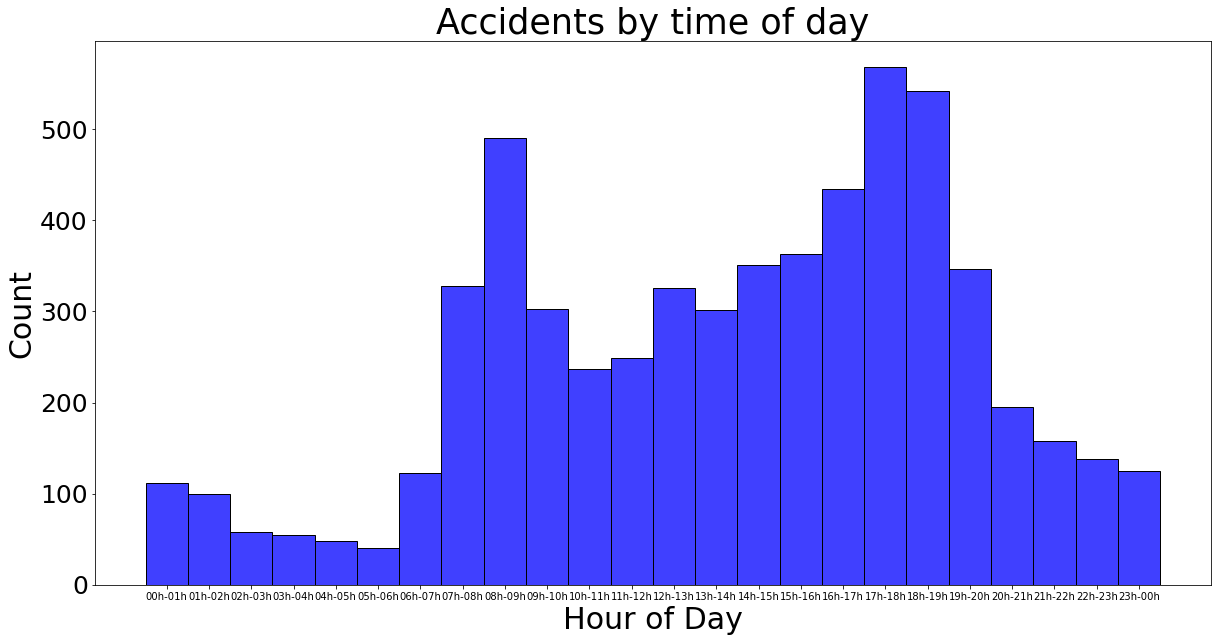

In [12]:
fig = plt.figure(figsize=(20,10))
sns.histplot(data = unf.AccidentHour_text, color = 'blue')
plt.title('Accidents by time of day',fontsize=35)
plt.xlabel('Hour of Day',fontsize=30)
plt.ylabel('Count',fontsize=30)

plt.yticks(fontsize=25)


In [13]:
#sort everything by accidentweekday for better plotting
unf = unf.sort_values(by = ['AccidentWeekDay'])

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

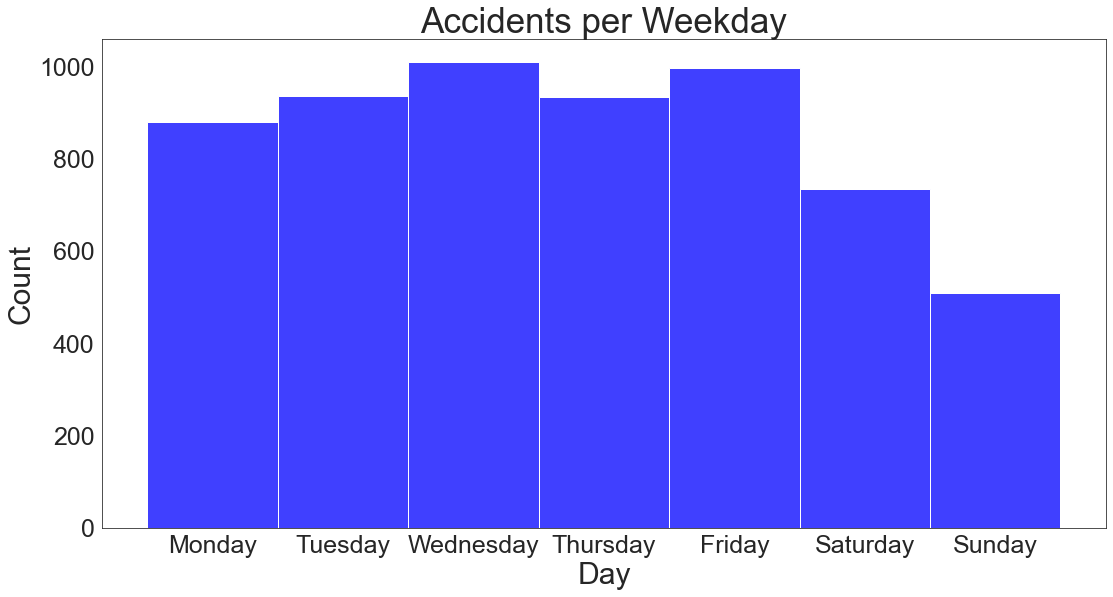

In [14]:
fig = plt.figure(figsize=(18,9))
sns.set_style("white")
sns.histplot(unf.AccidentWeekDay_en,  color = 'blue')
plt.title('Accidents per Weekday',fontsize=35)
plt.xlabel('Day',fontsize=30)
plt.ylabel('Count',fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)


In [23]:
#sort everything by accidentweekday for better plotting
unf = unf.sort_values(by = ['AccidentType'], ascending=False)

Text(0, 0.5, 'Count')

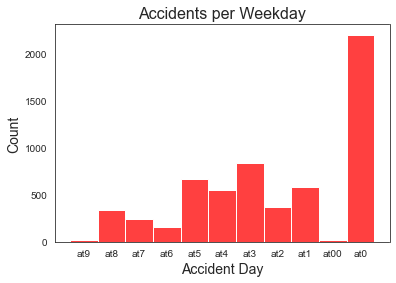

In [31]:
fig = plt.figure()
sns.histplot(data = unf.AccidentType , color = 'red')
plt.title('Accidents per Weekday',fontsize=16)
plt.xlabel('Accident Day',fontsize=14)
plt.ylabel('Count',fontsize=14)

In [62]:
acci = pd.read_csv('/Users/simon/Desktop/$Uni Unterlagen/Uzh Skirptz/FS22/EOS403/project/Velo-Zueri-Unfaelle/data/accidentsss.csv', sep = ';')
acci.head()

,Order,Unnamed: 1,AccidentType,AccidentType_de,AccidentType_en,types,AccidentSeverityCategory,AccidentSeverityCategory_de,AccidentSeverityCategory_en,AccidentInvolvingPedestrian,...,AccidentYear,AccidentMonth,AccidentMonth_de,AccidentWeekDay,AccidentWeekDay_de,AccidentHour,AccidentHour_text,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,3,BD0108A4C0AA5797E053DDB9D80A6DE2,at1,Überholunfall oder Fahrstreifenwechsel,Accident when overtaking or changing lanes,overtaking/changing lanes,as3,Unfall mit Leichtverletzten,Accident with light injuries,False,...,2021,1,Januar,aw402,Dienstag,12,12h-13h,NaN,NaN,NaN
1,1,B9B4FA6053F24D18E053DDB9D80AA25F,at0,Schleuder- oder Selbstunfall,Accident with skidding or self-accident,Skidding/Self-accident,as3,Unfall mit Leichtverletzten,Accident with light injuries,False,...,2021,1,Januar,aw403,Mittwoch,18,18h-19h,NaN,NaN,NaN
2,1,B89AB3CD7B723813E053DDB9D80AC872,at0,Schleuder- oder Selbstunfall,Accident with skidding or self-accident,Skidding/Self-accident,as2,Unfall mit Schwerverletzten,Accident with severe injuries,False,...,2021,1,Januar,aw402,Dienstag,17,17h-18h,NaN,NaN,NaN
3,1,B93C4E6792D1F31FE053DDB9D80A6C60,at0,Schleuder- oder Selbstunfall,Accident with skidding or self-accident,Skidding/Self-accident,as2,Unfall mit Schwerverletzten,Accident with severe injuries,False,...,2021,1,Januar,aw402,Dienstag,17,17h-18h,NaN,NaN,NaN
4,1,B928CA6BBD55222EE053DDB9D80A74EC,at0,Schleuder- oder Selbstunfall,Accident with skidding or self-accident,Skidding/Self-accident,as3,Unfall mit Leichtverletzten,Accident with light injuries,False,...,2021,1,Januar,aw402,Dienstag,8,08h-09h,NaN,NaN,0.0


(array([  0.,  50., 100., 150., 200., 250., 300.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

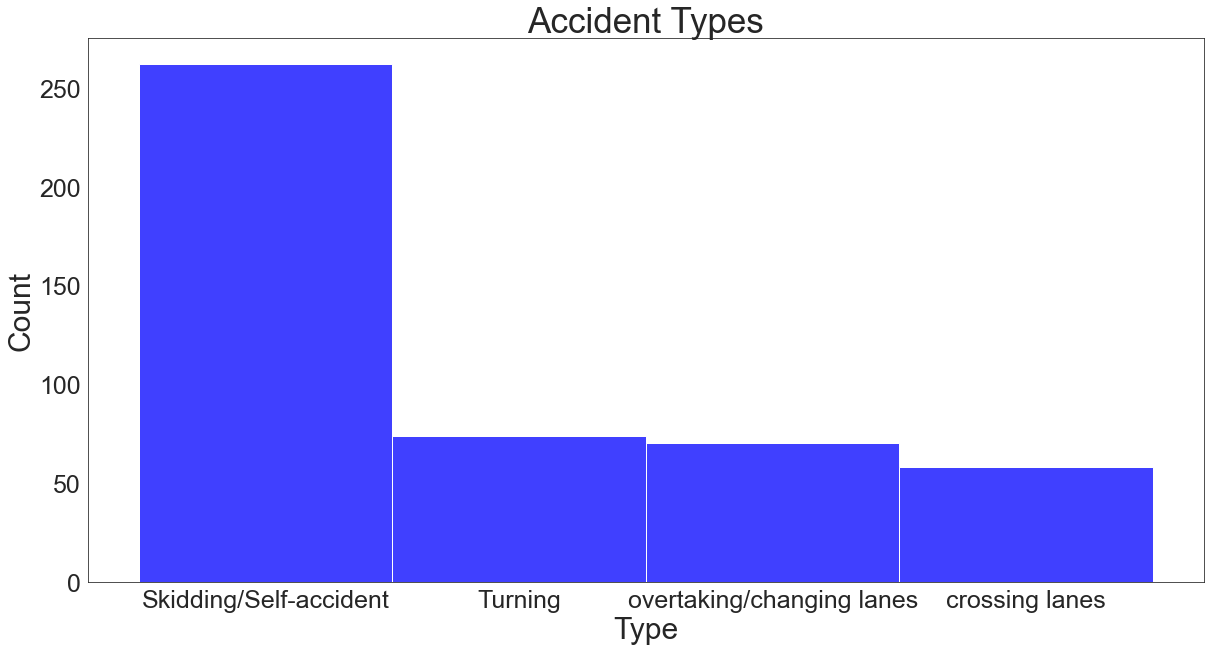

In [68]:
acci = acci.sort_values(by=['Order'])
fig = plt.figure(figsize=(20,10))
sns.histplot(data = acci.types, color = 'blue' ,binwidth=0.1)
plt.title('Accident Types',fontsize=35)
plt.xlabel('Type',fontsize=30)
plt.ylabel('Count',fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

count     5991
unique      11
top        at0
freq      2203
Name: AccidentType, dtype: object

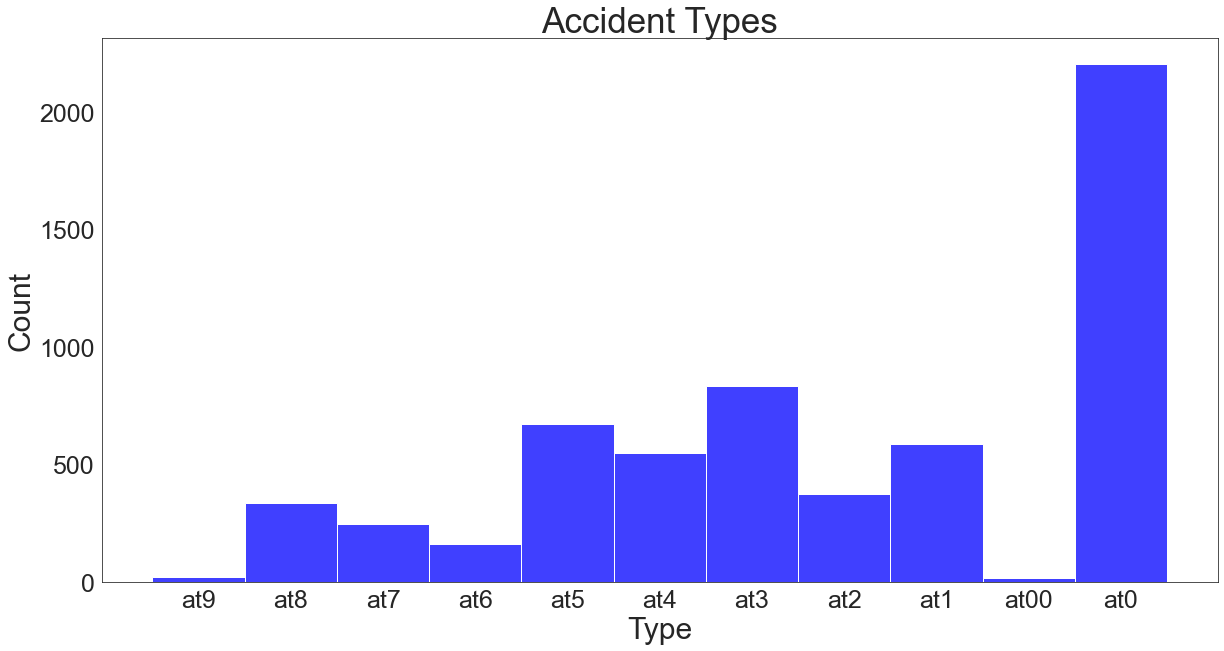

In [70]:
fig = plt.figure(figsize=(20,10))
sns.histplot(data = unf.AccidentType, color = 'blue' ,binwidth=0.1)
plt.title('Accident Types',fontsize=35)
plt.xlabel('Type',fontsize=30)
plt.ylabel('Count',fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

unf.AccidentType.describe()

In [ ]:
#sort everything by accidentmonth for better plotting
unf = unf.sort_values(by = ['AccidentMonth'])

(array([  0., 100., 200., 300., 400., 500., 600., 700., 800., 900.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

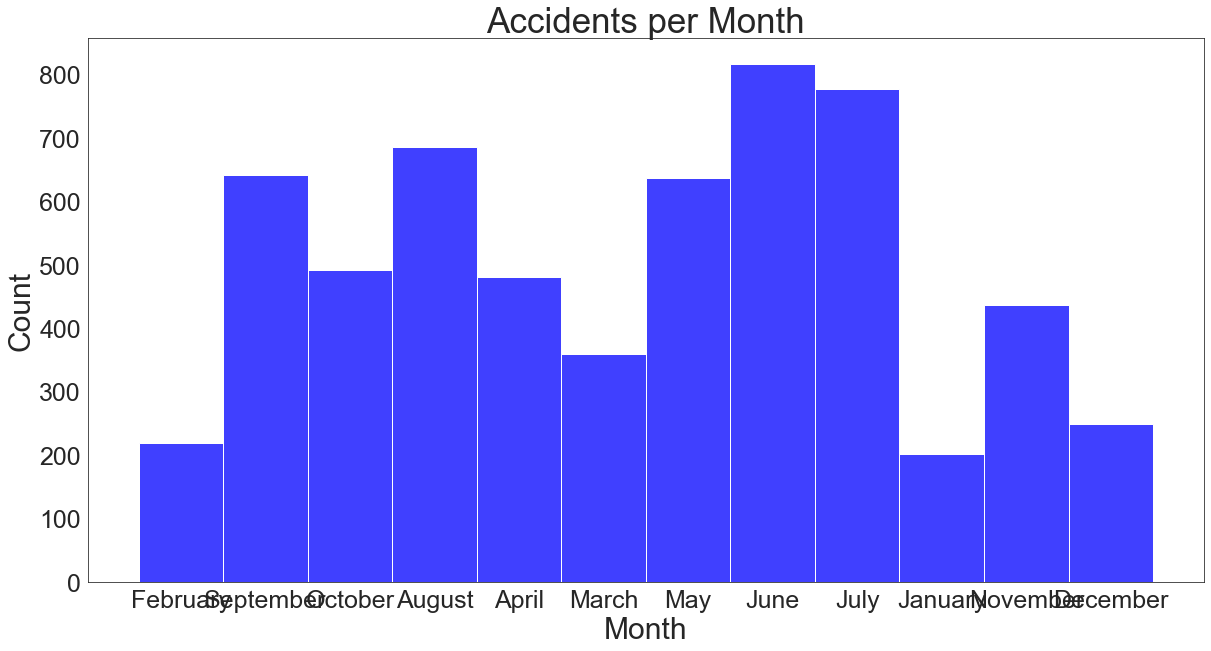

In [53]:
fig = plt.figure(figsize=(20,10))
sns.histplot(data = unf.AccidentMonth_en, color = 'blue' ,binwidth=0.5)
plt.title('Accidents per Month',fontsize=35)
plt.xlabel('Month',fontsize=30)
plt.ylabel('Count',fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

In [205]:
#sort everything by accidentYear for better plotting
unf = unf.sort_values(by = ['AccidentYear'])

0        2011
1        2011
2        2011
3        2011
4        2011
         ... 
53441    2021
53442    2021
53443    2021
53444    2021
53445    2021
Name: AccidentYear, Length: 53446, dtype: int64

Text(0, 0.5, 'Count')

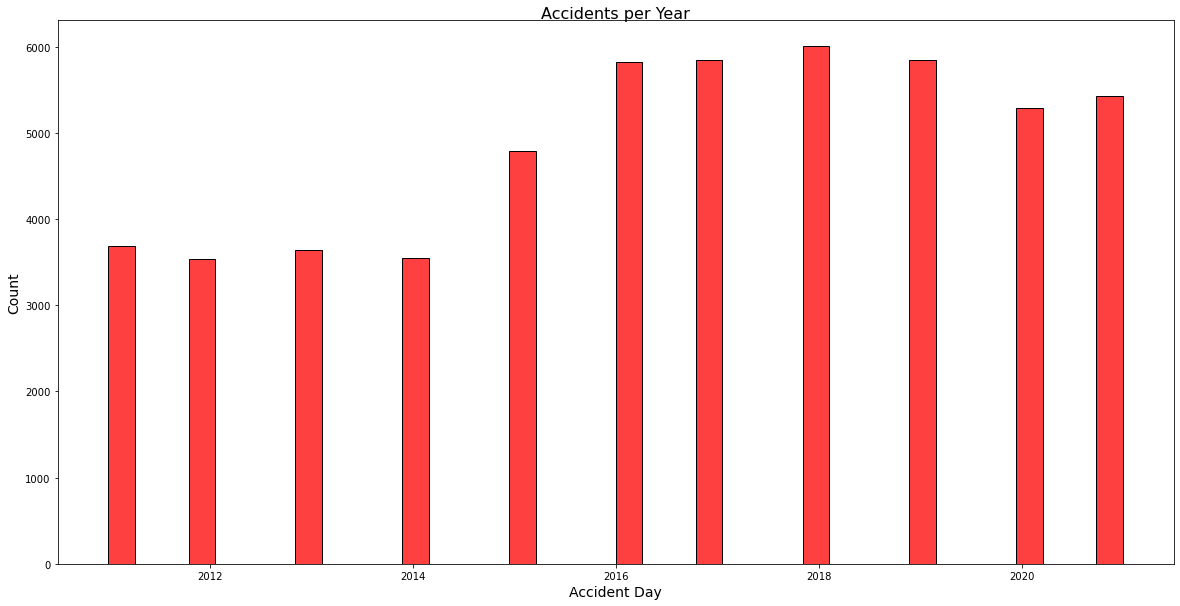

In [212]:
fig = plt.figure(figsize= (20,10))
sns.histplot(data = Unfaelle.AccidentYear, color = 'red' )
plt.title('Accidents per Year',fontsize=16)
plt.xlabel('Accident Day',fontsize=14)
plt.ylabel('Count',fontsize=14)

KeyboardInterrupt: 

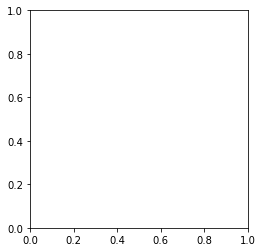

In [14]:
Zaehlungen.plot()
Zaehlungen.plot.title('Zae')

(array([2675000., 2677500., 2680000., 2682500., 2685000., 2687500.,
        2690000., 2692500.]),
 [Text(2675000.0, 0, '2.6750'),
  Text(2677500.0, 0, '2.6775'),
  Text(2680000.0, 0, '2.6800'),
  Text(2682500.0, 0, '2.6825'),
  Text(2685000.0, 0, '2.6850'),
  Text(2687500.0, 0, '2.6875'),
  Text(2690000.0, 0, '2.6900'),
  Text(2692500.0, 0, '2.6925')])

<Figure size 432x288 with 0 Axes>

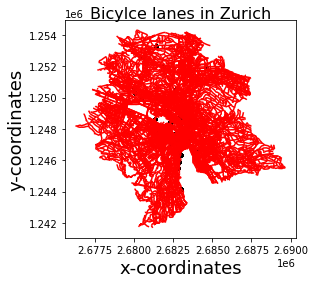

In [61]:

fig = plt.figure()
ax = VeloWege.plot(color = 'red', zorder=2)
Zaehlungen.plot(ax=ax, color = 'black', markersize=5, zorder=1)
plt.title('Bicylce lanes in Zurich',fontsize=16)
plt.xlabel('x-coordinates',fontsize=18)
plt.ylabel('y-coordinates',fontsize=18) 
plt.xticks(fontsize=10) 


<Figure size 432x288 with 0 Axes>

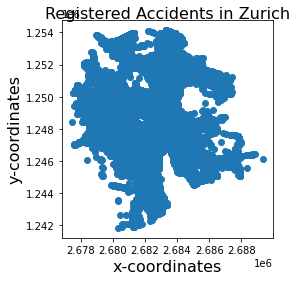

In [47]:
fig = plt.figure()
Unfaelle.plot()
plt.title('Registered Accidents in Zurich',fontsize=16)
plt.xlabel('x-coordinates',fontsize=16)
plt.ylabel('y-coordinates',fontsize=16)
plt.savefig('Unfaelle.png')

In [63]:
Unfaelle.describe()

,AccidentLocation_CHLV95_E,AccidentLocation_CHLV95_N,MunicipalityCode,AccidentYear,AccidentMonth,AccidentHour
count,5.344600e+04,5.344600e+04,53446.0,53446.000000,53446.000000,53442.000000
mean,2.682515e+06,1.248599e+06,261.0,2016.529039,6.713748,13.325942
std,1.784992e+03,2.320076e+03,0.0,3.023055,3.326783,5.174700
min,2.677442e+06,1.241844e+06,261.0,2011.000000,1.000000,0.000000
25%,2.681476e+06,1.247053e+06,261.0,2014.000000,4.000000,10.000000
50%,2.682650e+06,1.248142e+06,261.0,2017.000000,7.000000,14.000000
75%,2.683625e+06,1.250176e+06,261.0,2019.000000,10.000000,17.000000
max,2.689354e+06,1.254133e+06,261.0,2021.000000,12.000000,23.000000


In [72]:
Zaehlungen.info()
Zaehlungen.describe()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1178570 entries, 0 to 1178569
Data columns (total 10 columns):
 #   Column       Non-Null Count    Dtype   
---  ------       --------------    -----   
 0   FK_ZAEHLER   1178570 non-null  object  
 1   FK_STANDORT  1178570 non-null  int64   
 2   DATUM        1178570 non-null  object  
 3   VELO_IN      704810 non-null   float64 
 4   VELO_OUT     600754 non-null   float64 
 5   FUSS_IN      473760 non-null   float64 
 6   FUSS_OUT     473760 non-null   float64 
 7   OST          1178570 non-null  int64   
 8   NORD         1178570 non-null  int64   
 9   geometry     1178570 non-null  geometry
dtypes: float64(4), geometry(1), int64(3), object(2)
memory usage: 89.9+ MB


,FK_STANDORT,VELO_IN,VELO_OUT,FUSS_IN,FUSS_OUT,OST,NORD
count,1.178570e+06,704810.000000,600754.000000,473760.000000,473760.000000,1.178570e+06,1.178570e+06
mean,2.540828e+03,8.158380,5.600617,14.910385,11.850203,2.682510e+06,1.248716e+06
std,1.135860e+03,12.287068,7.919064,23.198232,18.586651,1.146152e+03,2.073100e+03
min,2.000000e+01,0.000000,0.000000,0.000000,0.000000,2.679339e+06,1.244140e+06
25%,1.692000e+03,0.000000,0.000000,1.000000,0.000000,2.682171e+06,1.247199e+06
50%,2.989000e+03,4.000000,3.000000,6.000000,4.000000,2.682756e+06,1.248451e+06
75%,3.012000e+03,11.000000,8.000000,19.000000,16.000000,2.683437e+06,1.250304e+06
max,4.243000e+03,384.000000,274.000000,575.000000,336.000000,2.684578e+06,1.253280e+06


In [74]:
#separating gemoetry with stadort as groupby does not work for geometry
geom = Zaehlungen[['FK_STANDORT', 'geometry']].copy()

geom

,FK_STANDORT,geometry
0,1357,POINT (2682973.000 1246329.000)
1,3927,POINT (2682873.000 1245891.000)
2,1358,POINT (2683557.000 1251702.000)
3,3011,POINT (2682978.000 1248744.000)
4,3279,POINT (2683437.000 1247199.000)
...,...,...
1178565,2991,POINT (2682756.000 1247323.000)
1178566,2993,POINT (2683573.000 1248545.000)
1178567,60,POINT (2682731.000 1247708.000)
1178568,3020,POINT (2680439.000 1249930.000)


In [35]:
#Remove unimportant data as well as NaN's
DeleteList=['FUSS_IN','FUSS_OUT']
Zaehlungen = Zaehlungen.drop(DeleteList, axis = 1)
Zaehlungen = Zaehlungen.dropna(axis=0, how='any', inplace=False)

KeyError: "['FUSS_IN' 'FUSS_OUT'] not found in axis"

In [36]:
Zaehlungen.head()

,FK_ZAEHLER,FK_STANDORT,DATUM,VELO_IN,VELO_OUT,OST,NORD,geometry
1,ECO09113499,3927,2021-01-01T00:00,0.0,3.0,2682873,1245891,POINT (2682873.000 1245891.000)
5,Y2H19111476,2991,2021-01-01T00:00,0.0,0.0,2682756,1247323,POINT (2682756.000 1247323.000)
6,ECO09113506,3923,2021-01-01T00:00,0.0,1.0,2681385,1247736,POINT (2681385.000 1247736.000)
8,Y2G13124879,60,2021-01-01T00:00,0.0,0.0,2682731,1247708,POINT (2682731.000 1247708.000)
10,Y2H19111477,2993,2021-01-01T00:00,2.0,1.0,2683573,1248545,POINT (2683573.000 1248545.000)


In [39]:
#have a look at all data points for one zaehler
#important..dont work with Zahler but rather use Standort, as Zaehler are used for multiple locations
Zaehlungen.loc[Zaehlungen['FK_ZAEHLER'] == 'ECO09113499']

,FK_ZAEHLER,FK_STANDORT,DATUM,VELO_IN,VELO_OUT,OST,NORD,geometry
1,ECO09113499,3927,2021-01-01T00:00,0.0,3.0,2682873,1245891,POINT (2682873.000 1245891.000)
38,ECO09113499,3927,2021-01-01T00:15,0.0,0.0,2682873,1245891,POINT (2682873.000 1245891.000)
110,ECO09113499,3927,2021-01-01T00:30,2.0,1.0,2682873,1245891,POINT (2682873.000 1245891.000)
112,ECO09113499,3927,2021-01-01T00:45,0.0,1.0,2682873,1245891,POINT (2682873.000 1245891.000)
149,ECO09113499,3927,2021-01-01T01:00,0.0,0.0,2682873,1245891,POINT (2682873.000 1245891.000)
...,...,...,...,...,...,...,...,...
1178430,ECO09113499,3927,2021-12-31T22:45,3.0,0.0,2682873,1245891,POINT (2682873.000 1245891.000)
1178463,ECO09113499,3927,2021-12-31T23:00,0.0,2.0,2682873,1245891,POINT (2682873.000 1245891.000)
1178496,ECO09113499,3927,2021-12-31T23:15,3.0,0.0,2682873,1245891,POINT (2682873.000 1245891.000)
1178529,ECO09113499,3927,2021-12-31T23:30,1.0,0.0,2682873,1245891,POINT (2682873.000 1245891.000)


In [64]:
#Count data is represented in a 15min frequency. Better work with 1h frequency.
gruppiert = Zaehlungen.groupby("FK_ZAEHLER").sum()

gruppiert


,FK_STANDORT,VELO_IN,VELO_OUT,OST,NORD
FK_ZAEHLER,,,,,
ECO09113499,136848096,336158.0,206575.0,93492758304,43416809568
ECO09113500,95518656,102930.0,104915.0,85991094912,40143839424
ECO09113503,102840192,134502.0,74659.0,70299684000,32682817440
ECO09113506,96776487,161097.0,175686.0,66147086565,30780399384
ECO10053914,101776128,66421.0,58600.0,91708083456,42775262592
Y2G13124877,8123292,2371.0,2512.0,12880511681,5984681749
Y2G13124879,2102400,187064.0,96434.0,94002894240,43719688320
Y2H16039396,34592012,172106.0,46896.0,28314316576,13177170916
Y2H16069942,25649280,68338.0,303815.0,93953417760,43753221600


In [63]:
#Count data is represented in a 15min frequency. Better work with 1h frequency. Approach to get there with a loop..doesnt work just yet.
inn = []
out = []

for i in range(len(Zaehlungen)):
    if Zaehlungen.loc[Zaehlungen['FK_ZAEHLER']] == Zaehlungen.loc[Zaehlungen['FK_ZAEHLER']]:
        if Zaehlungen.DATUM.astype(str).str[:13] == Zaehlungen.DATUM.astype(str).str[:13]:
            x = VELO_IN[i]
            y = VELO_OUT[i]
            inn[i] = x + VELO_IN[i]
            out[i] = y + VELO_OUT[i]

KeyError: "None of [Index(['ECO09113499', 'Y2H19111476', 'ECO09113506', 'Y2G13124879',\n       'Y2H19111477', 'Y2H20063173', 'Y2H18106792', 'ECO10053914',\n       'Y2H16039396', 'Y2H16069942',\n       ...\n       'Y2H19090841', 'Y2H19101255', 'Y2H20011946', 'Y2H19101198',\n       'ECO09113499', 'Y2H19070283', 'Y2H19111476', 'Y2H19111477',\n       'Y2G13124879', 'ECO09113500'],\n      dtype='object', length=600754)] are in the [index]"

2: We segment the bicycle path network into nodes and edges


3: Then all accidents get attributed to the spatially closest edge
Accidents get also attributed by severity of the accident (categories already set by raw data)

4: Then, accidents normalized by the closest (determined via Voronoi tessellation) counting station value. 
The resulting graph of safety-weighted edges has an x, y and t (Lat, Long and Daytime) dimension. 

5: We will then use this graph to train a model (Maybe SVM, GCN or we will see what the lecture brings us).
The model should then be capable to predict the safety of any rout at any time in Zurich

BONUS:

If time allows it, we will also introduce the following features:
Weather data (to introduce an additional dimension, like dry, wet & frozen)
Topography (to introduce an additional weighting criteria: steepness of the segments) 
Connect our model to an actual routing engine (which uses travel time for costing of the edges)